In [5]:
import gym
import gym_labyrinth
import time 
import numpy as np 
import matplotlib
import matplotlib.pyplot as plt

env = gym.make('Labyrinth-v0', connect_gui=False, random_agent_pos=0)
num_reset = 50

## Verifying Wind condition

In [6]:
system_vectors = [
    np.array([0,0, 0,0,0,0]),
    
    np.array([1,0, 0,0,0,0]),
    np.array([1,0.25,0,0,0,0]),
    np.array([1,0.5 ,0,0,0,0]),
    np.array([1,0.75,0,0,0,0]),
    
    np.array([0.5,0, 0,0,0,0]),
    np.array([0.5,0.25,0,0,0,0]),
    np.array([0.5,0.5 ,0,0,0,0]),
    np.array([0.5,0.75,0,0,0,0]),
] 
agent_positions = []
for system_vector in system_vectors:
    agent_positions.append([])
    env.set_system_params(system_vector)
    count = 0 
    done = True 
    while count < num_reset:
        if done:
            timestep=0
            env.reset()
            count +=1
        state, reward, done, info = env.step(env.action_space.sample())
        agent_positions[-1].append(env.objects['agent'][0].position[:2])
        timestep +=1 
        if timestep > 50:
            done=True 
            
x_min = np.quantile([np.quantile(np.stack(a)[:,0], 0.1) for a in agent_positions], 0.1)
x_max = np.quantile([np.quantile(np.stack(a)[:,0], 0.9) for a in agent_positions], 0.9)
y_min = np.quantile([np.quantile(np.stack(a)[:,1], 0.1) for a in agent_positions], 0.1)
y_max = np.quantile([np.quantile(np.stack(a)[:,1], 0.9) for a in agent_positions], 0.9)

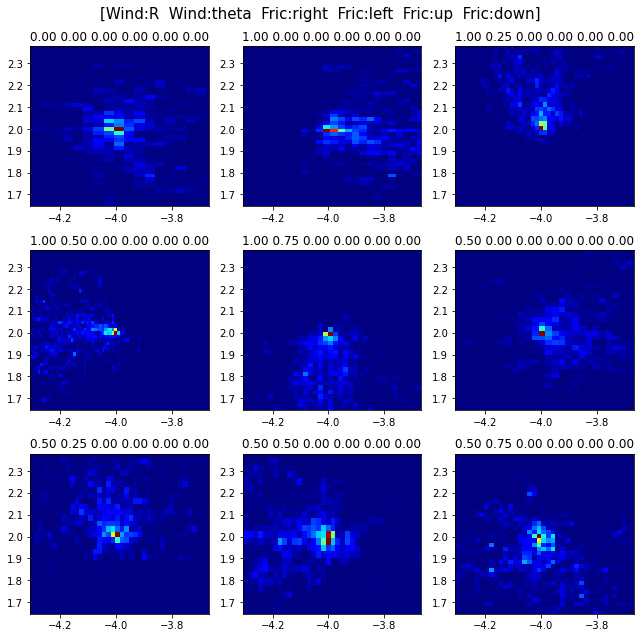

In [7]:
names = ["[Wind:R", "Wind:theta", "Fric:right", "Fric:left","Fric:up","Fric:down]"]

ratio = 3.0
fig ,axes = plt.subplots((len(system_vectors)//3), 3, figsize=(ratio*3, ratio*len(system_vectors)//3))
fig.suptitle("  ".join(names), fontsize=15)
axes = axes.flat
for vec, poses in zip(system_vectors, agent_positions):
    ax = next(axes)
    poses = np.stack(poses)
    x,y = poses[:,0], poses[:,1]
    ax.hist2d(x, y, bins=(50, 50), cmap=plt.cm.jet)
    ax.set_facecolor(matplotlib.cm.jet(0))
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.set_title(" ".join([f"{v:.2f}" for v in vec]))
plt.tight_layout()
plt.show()

## Verifying Friction Condition

In [8]:
system_vectors = [
    np.array([0,0,0,0,0,0]),
    
    np.array([0,0,1,0,0,0]),  # not able to move in the direction
    np.array([0,0,0,1,0,0]),  # not able to move in the direction
    np.array([0,0,0,0,1,0]),  # not able to move in the direction
    np.array([0,0,0,0,0,1]),  # not able to move in the direction
    
    np.array([0,0,0.5,0,0,0]),
    np.array([0,0,0,0.5,0,0]),
    np.array([0,0,0,0,0.5,0]),
    np.array([0,0,0,0,0,0.5]),
] 
agent_positions = []
for system_vector in system_vectors:
    agent_positions.append([])
    env.set_system_params(system_vector)
    count = 0 
    done = True 
    while count < num_reset:
        if done:
            timestep=0
            env.reset()
            count +=1
        state, reward, done, info = env.step(env.action_space.sample())
        agent_positions[-1].append(env.objects['agent'][0].position[:2])
        timestep +=1 
        if timestep > 50:
            done=True 
            
x_min = np.quantile([np.quantile(np.stack(a)[:,0], 0.1) for a in agent_positions], 0.1)
x_max = np.quantile([np.quantile(np.stack(a)[:,0], 0.9) for a in agent_positions], 0.9)
y_min = np.quantile([np.quantile(np.stack(a)[:,1], 0.1) for a in agent_positions], 0.1)
y_max = np.quantile([np.quantile(np.stack(a)[:,1], 0.9) for a in agent_positions], 0.9)

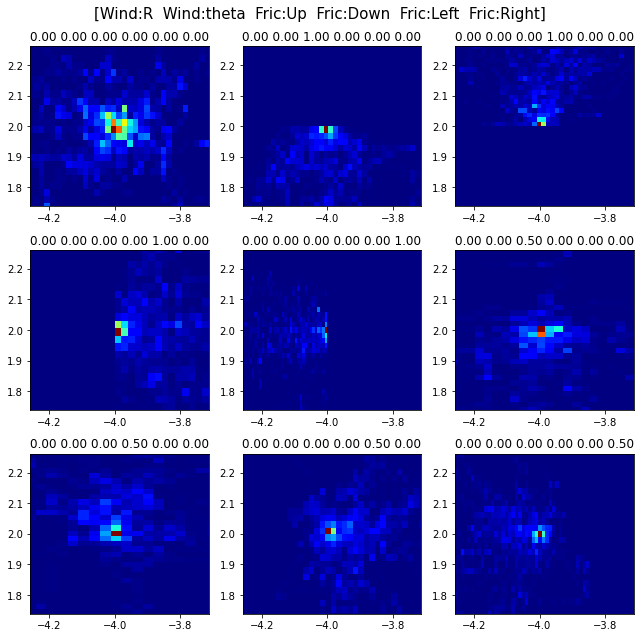

In [9]:
names = ["[Wind:R", "Wind:theta", "Fric:Up", "Fric:Down","Fric:Left","Fric:Right]"]

ratio = 3.0
fig ,axes = plt.subplots((len(system_vectors)//3), 3, figsize=(ratio*3, ratio*len(system_vectors)//3))
fig.suptitle("  ".join(names), fontsize=15)
axes = axes.flat
for vec, poses in zip(system_vectors, agent_positions):
    ax = next(axes)
    ax.set_facecolor(matplotlib.cm.jet(0))
    poses = np.stack(poses)
    x,y = poses[:,0], poses[:,1]
    ax.hist2d(x, y, bins=(50, 50), cmap=plt.cm.jet)
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.set_title(" ".join([f"{v:.2f}" for v in vec]))
plt.tight_layout()
plt.show()
    